In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

sns.set(rc={'figure.figsize':(10,7)})
warnings.filterwarnings('ignore')


####Análisis gráfico de variables cuantitativas.

El análisis gráfico, tiene como objetivo visualizar, de forma aproximada, la forma de la gráfica de la función de densidad $f$ de la variable aleatoria subyacente, que dio lugar a las observaciones muestrales; o bien, encontrar relaciones lineales entre variables.

#####Histograma.

Un histograma, es una representación visual aproximada de la función de densidad desconocida, obtenida a partir de los valores observados $(x_1,...,x_n)$.

La construcción de un histograma, es como sigue: Se elige una partición del eje real en intervalos disjuntos, y se define una función escalonada, que es constante en cada intervalo de la partición, y tal que la altura de cada escalón es proporcional al procentaje de observaciones que yacen en el intervalo correspondiente.

La función escalonada resultante, es una aproximación a la densidad desconocida.

La definición formal, es como sigue: Sea $n\in\mathbb{N}$; $x_1,...,x_n\in\mathbb{R}$; $\kappa\in\mathbb{R}$ $h>0$; $\lbrace I_j\rbrace_{j\in\mathbb{Z}}$ una partición regular de $\mathbb{R}$, formada por intervalos de longitud $h$, donde $I_j = [\kappa+(j-1)h,\kappa+jh)$.

El histograma de $(x_1,...,x_n)$, con ancho de barra $h$, y origen $\kappa$, es la gráfica de la función:

$hist_{x_1,...,x_n}:\mathbb{R}\rightarrow\mathbb{R}$, $hist_{x_1,...,x_n}(y):= \frac{1}{h}\sum_{j\in\mathbb{Z}}(\textbf{1}_{\lbrace y\in I_j\rbrace}\frac{1}{n}\sum_{i=1}^n\textbf{1}_{\lbrace x_i\in I_j\rbrace})$

Es interesante señalar, que $hist_{x_1,...,x_n}$ tiene las propiedades de una función de densidad de probabilidad.

Es importante elegir un valor adecuado de $h$, para poder tener una visualización ilustrativa del histograma, y ello depende de la estructura de la muestra. En principio, el valor de $h$ debería depender de $n$: Mientras más grande sea $n$, $h$ puede ser más pequeño sin perder información; y a la inversa. Es decir, tener más observaciones, nos permite explorar aspectos más detallados de la estrcutrua de la muestra.

Suele tomarse como el número de intervalos como $\sqrt n$, o $log(n)+1$.

Una desventaja de los histogramas, es que pueden ser fácilmente malinterpretados, por tratar de extraer información más detallada de lo que la muestra permite.

Hay que tener cuidado con los valores atípicos, porque podrían llevar a una forma no conveniente del histograma.

In [8]:
m = input("Tamaño de la muestra: ")
data_0 = np.random.normal(0,1,int(m))
print(data_0[0:3])


Tamaño de la muestra: 1000
[-0.95546398 -0.15673603 -0.22874916]


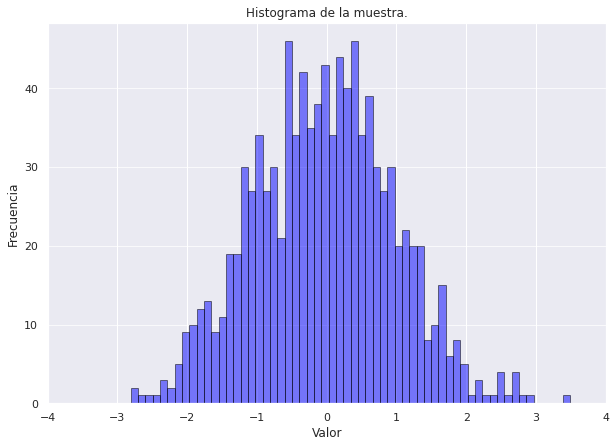

In [9]:
frecuencias = pd.Series(data_0)
frecuencias.plot(kind='hist', grid=True, bins=60,
                   color='blue', alpha=0.5, edgecolor='black', figsize=(10,7))
plt.title('Histograma de la muestra.')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.xlim(-4,4)
plt.grid(axis='y', alpha=0.75)
plt.show()


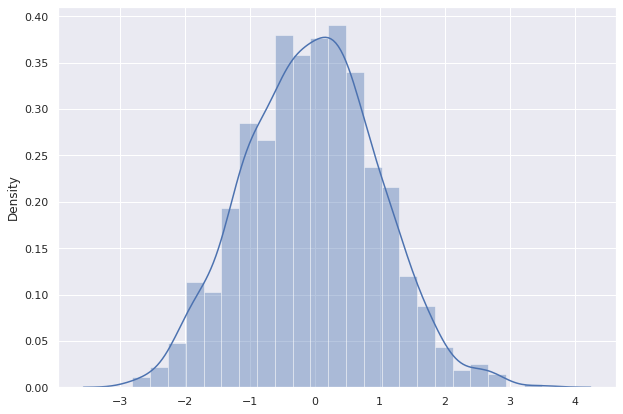

In [10]:
sns.set_style('darkgrid')
sns.distplot(data_0);


A continuación, se muestra una imagen con algunas conclusiones rápidas que se pueden obtener de histogramas con distinta simetría:
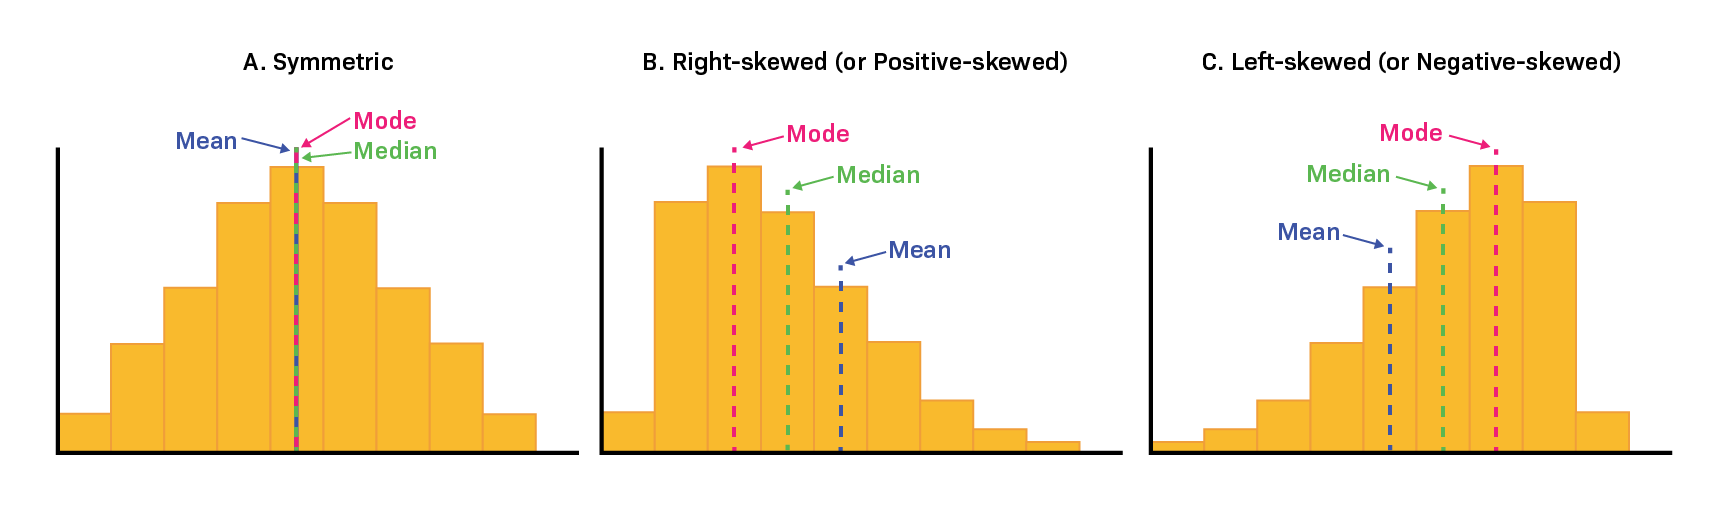

#####Boxplot, o diagrama de caja y brazos.

El boxplot, es un diagrama, que utiliza la información concerniente a los cuartiles, para describir la estructura de la muestra, que no requiere la especificación de ningún parámetro de ajuste.

Para una muestra $(x_1,...,x_n)$, sean $W_1:=min(\lbrace x_1,...,x_n\rbrace\cap[Q_1-\frac{3}{2}IQR])$, $W_2:=max(\lbrace x_1,...,x_n\rbrace\cap[Q_3+\frac{3}{2}IQR])$.

Para construir el boxlpot, se procede como sigue: 

*   Se ubican en el eje real los siguientes puntos; $W_1\leq Q_1\leq Q_2\leq Q_3\leq W_2$. 
*   Se construye una caja rectangular con lados en $Q_1$ y $Q_3$.
*   Se traza una línea perpendicular al eje real, dentro de la caja, a la altura de $Q_2$.
*   Se marcan por separado las observaciones fuera de $[W_1,W_2]$, que son los valores atípicos.



El boxplot informa sobre la dispersión presentando los cuartiles, y el tamaño del $IQR$: Distancias grandes, representan gran dispersión. Además, las asimetrías pueden ser estimadas observando la posición de los cuartiles, y de $W_1$ y $W_2$ respecto a la mediana. Finalmente, nos permite tener una idea sobre colas pesadas, viendo el número de valores atípicos, y el lado en el que se presentan.

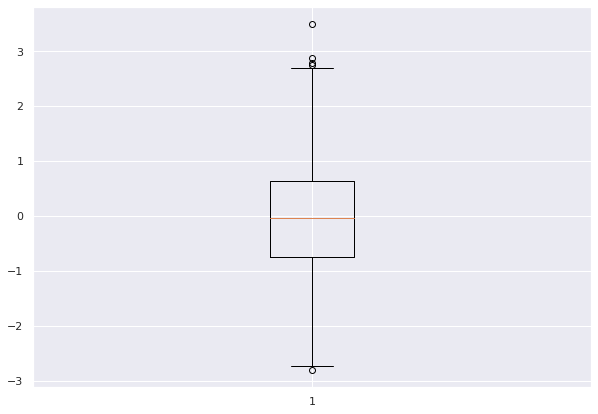

In [11]:
plt.boxplot(data_0)
plt.show()


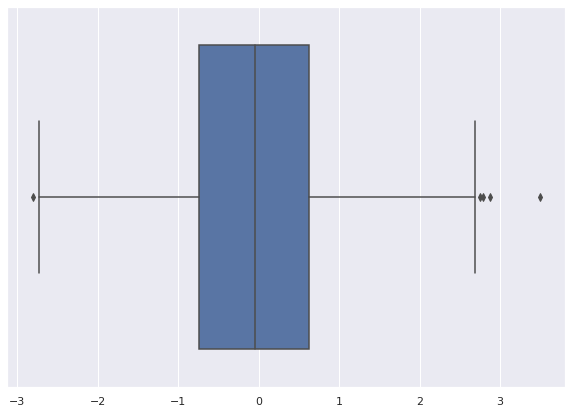

In [12]:
sns.boxplot(data_0);


####Comparación de variables.

Hasta ahora, nos hemos enfocado en analizar una variable de los individuos de una muestra; sin embargo, es usual que en los datasets, se describan observaciones sobre varias variables de los individuos; por lo que es conveniente tener herramientas para identificar relaciones entre las variables.

In [17]:
df = pd.read_csv('weight-height.csv')
df


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


#####Boxplot.

El boxplot nos puede ayudar a comparar la forma de la distribución de las variables, veamos un ejemplo.

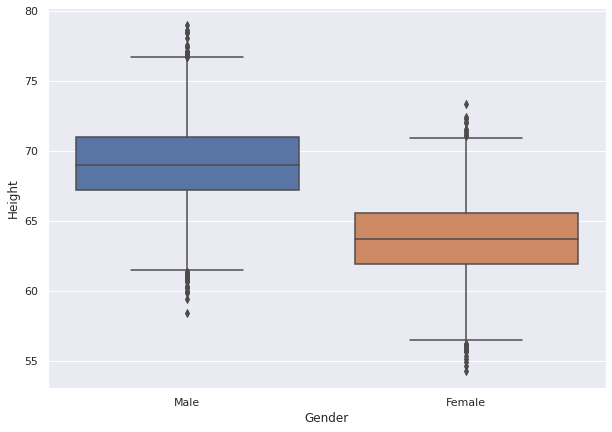

In [18]:
to_replace = {0:'Male', 1: 'Female'}
df['Gender'] = df['Gender'].replace(to_replace=to_replace)
order = ["Male", "Female"]
sns.boxplot(x="Gender", y="Height", data=df, order=order);


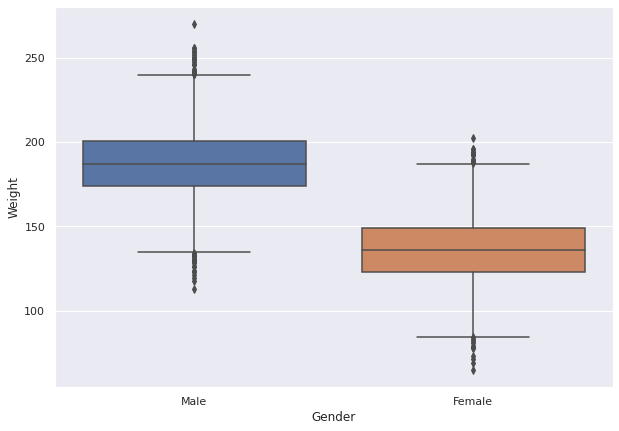

In [20]:
to_replace = {0:'Male', 1: 'Female'}
df['Gender'] = df['Gender'].replace(to_replace=to_replace)
order = ["Male", "Female"]
sns.boxplot(x="Gender", y="Weight", data=df, order=order);


#####Histograma.

El histograma, también puede usarse para comparar gráficamente dos variables.

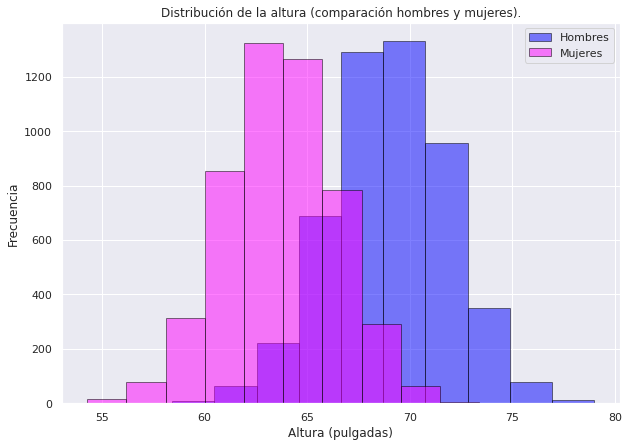

In [21]:
df[df['Gender'] == 'Male'].Height.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].Height.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Hombres', 'Mujeres'])
plt.title('Distribución de la altura (comparación hombres y mujeres).')
plt.xlabel('Altura (pulgadas)')
plt.ylabel('Frecuencia');


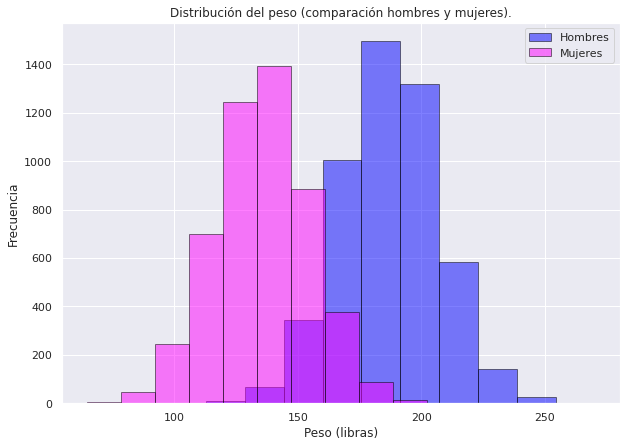

In [22]:
df[df['Gender'] == 'Male'].Weight.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].Weight.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Hombres', 'Mujeres'])
plt.title('Distribución del peso (comparación hombres y mujeres).')
plt.xlabel('Peso (libras)')
plt.ylabel('Frecuencia');


#####Diagramas de dispersión.

Los diagramas de dispersión, permiten comparar dos variables utilizando un plano cartesiano, y asignando los valores de un eje a una variable, y los valores del segundo eje a la segunda variable. Los datos se muestran como una colección de puntos.

Es posible encontrar correlaciones entre las variables, ya sean positivas (si el patrón de puntos tiene pendiente positiva), o negativas (si el patrón de puntos tiene pendiente negativa),

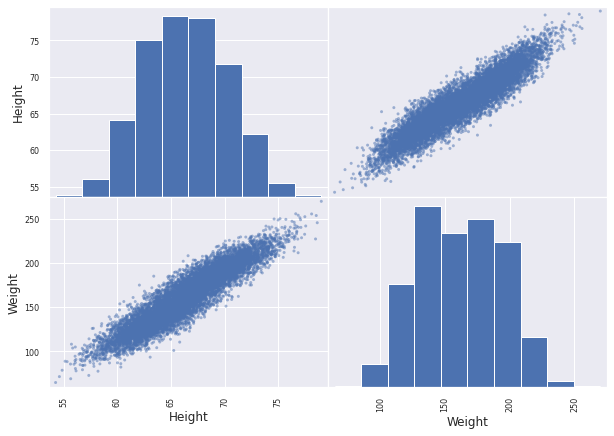

In [23]:
pd.plotting.scatter_matrix(df);


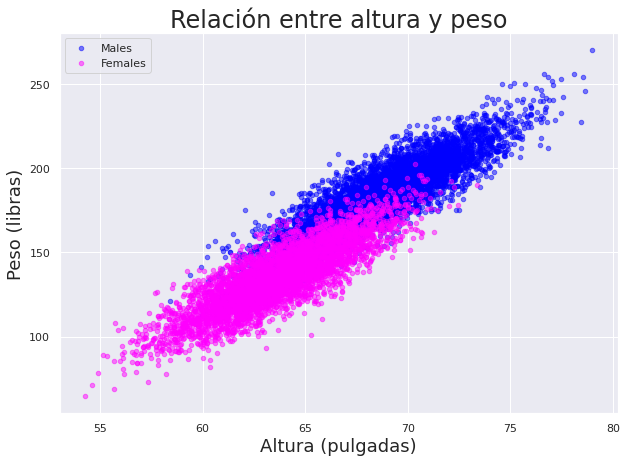

In [24]:
ax1 = df[df['Gender'] == 'Male'].plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relación entre altura y peso', size=24)
plt.xlabel('Altura (pulgadas)', size=18)
plt.ylabel('Peso (libras)', size=18);


In [25]:
df.corr()


,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


In [28]:
d = pd.read_csv('Book1.csv')
d


,Glucosa en ayunas (mg/dl),glucosa pos carga (mg/dl) 2h > 75 g,Hemoglobina Glucosilada,T2D= diabetes tipo 2. \n
0,107.0,221.0,7.4,t2d
1,120.0,225.0,6.0,t2d
2,118.0,132.0,6.5,t2d
3,331.0,NaN,9.6,t2d
4,392.0,NaN,10.1,t2d
...,...,...,...,...
56,230.0,NaN,11.1,t2d
57,97.0,91.0,NaN,normal
58,281.0,NaN,10.3,t2d
59,102.0,224.0,7.4,t2d


In [39]:
d.columns

Index(['Glucosa en ayunas (mg/dl)', 'glucosa pos carga (mg/dl) 2h > 75 g ',
       'Hemoglobina Glucosilada', 'T2D= diabetes tipo 2. \n'],
      dtype='object')

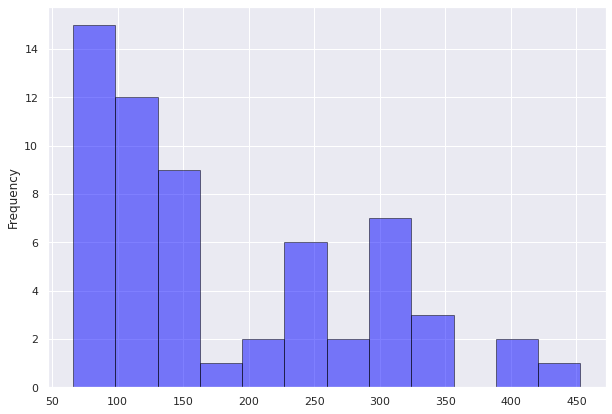

In [33]:
d["Glucosa en ayunas (mg/dl)"].plot(kind='hist', grid=True, bins=12,
                   color='blue', alpha=0.5, edgecolor='black', figsize=(10,7));
                   

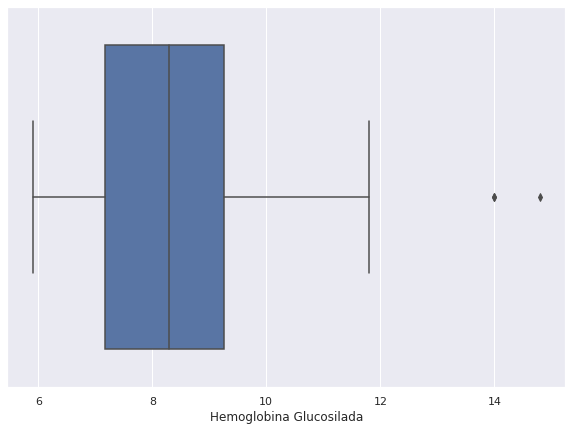

In [36]:
sns.boxplot(d["Hemoglobina Glucosilada"]);

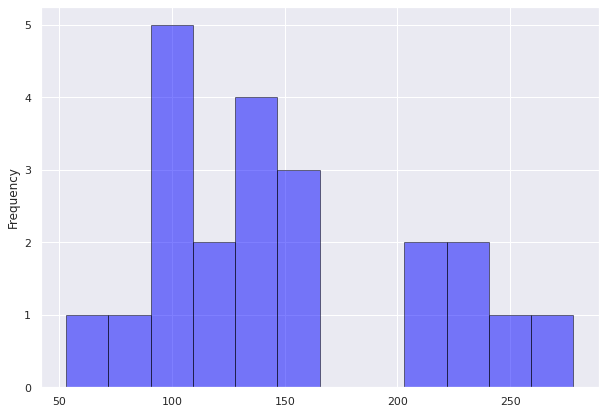

In [40]:
d["glucosa pos carga (mg/dl) 2h > 75 g "].plot(kind='hist', grid=True, bins=12,
                   color='blue', alpha=0.5, edgecolor='black', figsize=(10,7));
                   

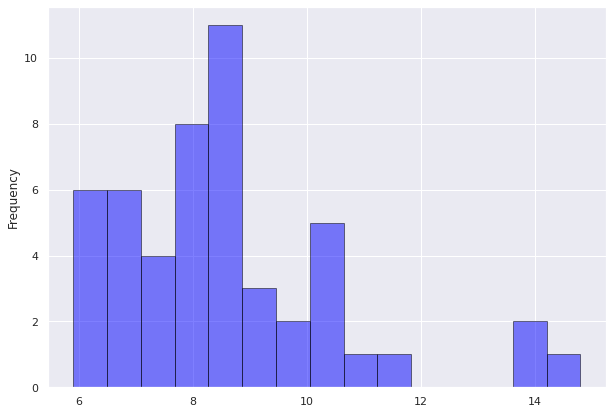

In [42]:
d["Hemoglobina Glucosilada"].plot(kind='hist', grid=True, bins=15,
                   color='blue', alpha=0.5, edgecolor='black', figsize=(10,7));

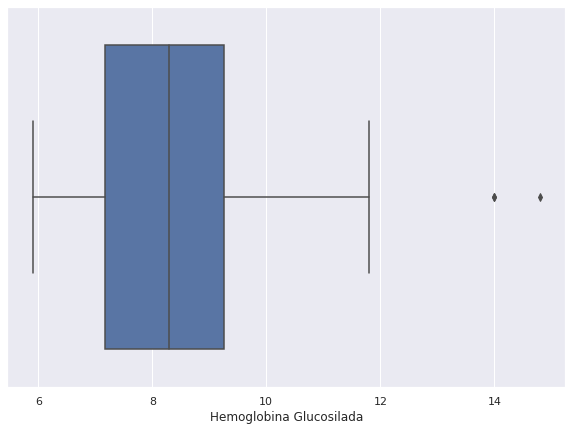

In [43]:
sns.boxplot(d["Hemoglobina Glucosilada"]);

In [44]:
d.corr()

,Glucosa en ayunas (mg/dl),glucosa pos carga (mg/dl) 2h > 75 g,Hemoglobina Glucosilada
Glucosa en ayunas (mg/dl),1.000000,0.678365,0.628432
glucosa pos carga (mg/dl) 2h > 75 g,0.678365,1.000000,-0.269114
Hemoglobina Glucosilada,0.628432,-0.269114,1.000000


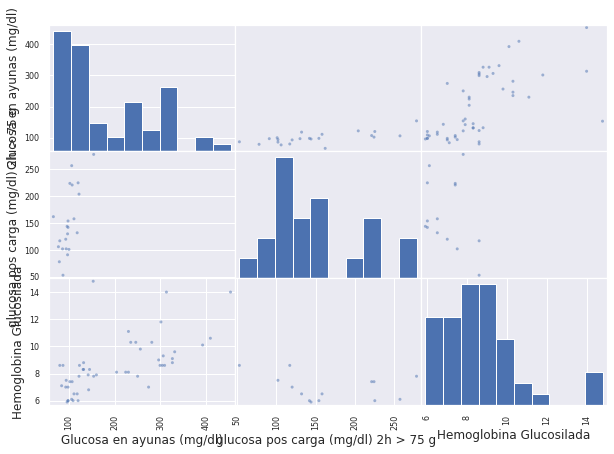

In [46]:
pd.plotting.scatter_matrix(d);


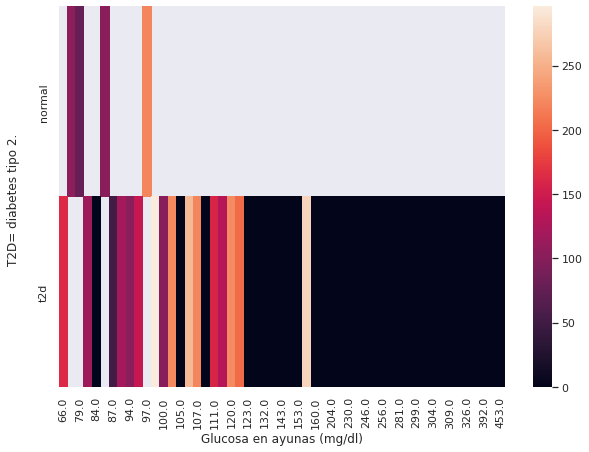

In [51]:
d_2 = d.pivot_table(index=d.columns[3], columns=d.columns[0], values=d.columns[1], aggfunc = 'sum')
sns.heatmap(d_2);
